In [1]:
import pandas as pd
from fredapi import Fred
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt


import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Set up the API key and initialize FRED
api_key = 'd755e59a79add62ef412263b9414d1ac'  # Replace 'your_fred_api_key' with your actual FRED API key
fred = Fred(api_key=api_key)

# Step 2: Fetch the unemployment rate data
series_id = 'UNRATE'  # This is the series ID for the Unemployment Rate in the United States
df = fred.get_series(series_id)

# Step 3: Preparing the data
df.dropna(inplace=True)  # Drop any missing values
df.index = pd.to_datetime(df.index)  # Ensure the index is datetime type


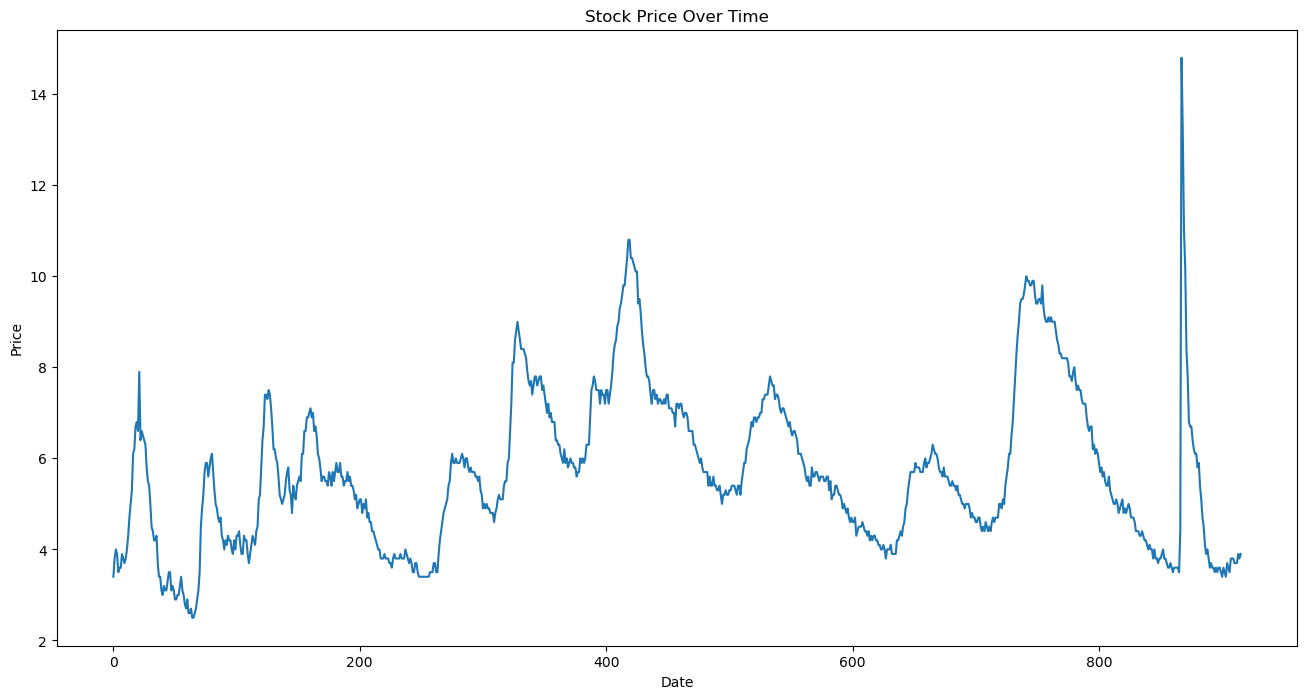

In [15]:
# Visualize the historical stock prices
plt.figure(figsize=(16, 8))
plt.plot(df[0])  # Plotting the 'Adj Close' prices
plt.title('Stock Price Over Time')  # Setting the title of the plot
plt.xlabel('Date')  # Setting the label for the x-axis
plt.ylabel('Price')  # Setting the label for the y-axis
plt.show()  # Display the plot

In [19]:
# Resetting index to make 'Date' a regular column
df = df.reset_index()

# Selecting the 'Date' (ds) and 'Close' (y) columns from the stock_data DataFrame
df = df[['index', 0]]

# Renaming columns for compatibility with Prophet
# 'Date' is renamed to 'ds' (datestamp), and 'Close' is renamed to 'y' (target variable)
df = df.rename(columns={'index': 'ds', 0: 'y'})

In [20]:
# Instantiate Prophet model
m = Prophet()

In [21]:
# Fit the model with historical stock data
m.fit(df)  # The model is trained using the historical stock data

17:43:04 - cmdstanpy - INFO - Chain [1] start processing
17:43:05 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# Create a dataframe with future dates for prediction
# The `periods` parameter determines how many future data points to create
future = m.make_future_dataframe(periods=12)  # Generating 365 days (1 year) of future dates

In [29]:
# Generate predictions for the future dates using the fitted model
forecast = m.predict(future)

c:\Users\james\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\james\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


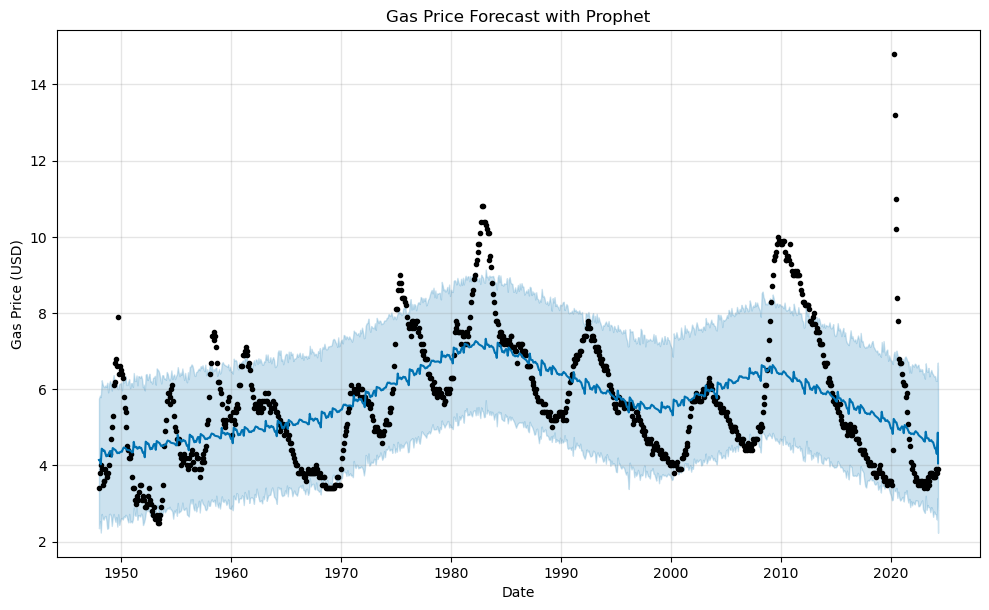

In [30]:
# Visualize the forecast
fig1 = m.plot(forecast)

# Add title to the plot
plt.title(f'Gas Price Forecast with Prophet')

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
plt.ylabel('Gas Price (USD)')

# Display the plot
plt.show()

c:\Users\james\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\james\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\james\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

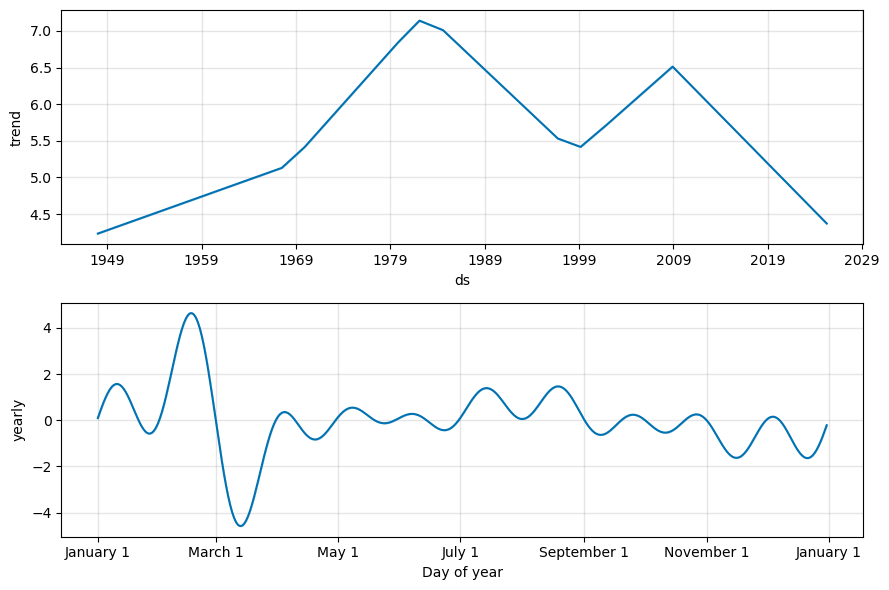

In [25]:
# Visualize components of the forecast
fig2 = m.plot_components(forecast)

plt.show()